In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from yellowbrick.classifier import ConfusionMatrix

In [2]:
dataset = pd.read_csv("letter-recognition.data", sep = ",")

In [3]:
names = ['Class',
         'x-box',
         'y-box',
         'width',
         'high',
         'onpix',
         'x-bar',
         'y-bar',
         'x2bar',
         'y2bar',
         'xybar',
         'x2ybr',
         'xy2br',
         'x-ege',
         'xegvy',
         'y-ege',
         'yegvx']

In [4]:
X = dataset.iloc[:, 1 : 17]
Y = dataset.select_dtypes(include = [object])

In [5]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

In [8]:
mlp = MLPClassifier(hidden_layer_sizes = (250, 300), max_iter = 1000000, activation = 'logistic')

In [9]:
cm = ConfusionMatrix(mlp, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

ConfusionMatrix(ax=<Axes: >,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x000001748F8C9110>,
                estimator=MLPClassifier(activation='logistic',
                                        hidden_layer_sizes=(250, 300),
                                        max_iter=1000000))

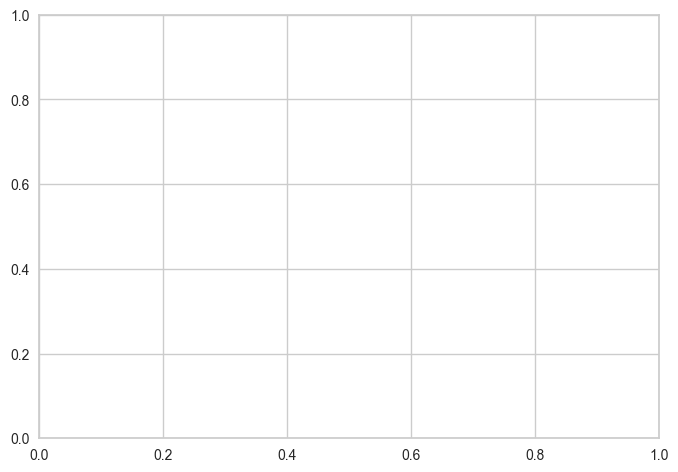

In [10]:
cm.fit(X_train, Y_train.values.ravel())


In [11]:
cm.score(X_validation, Y_validation)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.97575

In [12]:
predictions = cm.predict(X_validation)

In [13]:
print("Accuracy: ", accuracy_score(Y_validation, predictions))


Accuracy:  0.97575


In [14]:
print(confusion_matrix(Y_validation, predictions))


[[170   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 140   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0 159   0   0   0   0   0   0   0   0   0   0   0   1   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   1   0 170   0   0   0   0   0   0   0   0   0   2   0   1   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   4   0 141   0   1   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   0 134   0   0   1   0   0   0   0   0   0   1   0   0
    0   1   0   0   0   0   0   0]
 [  0   1   0   0   2   0 135   0   0   0   0   1   1   0   0   0   1   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0 129   0   0   2   0   0   1   1   0   0   2
    0   0   1   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0 140   7   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   0   0   0  

In [15]:
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.99415   1.00000   0.99707       170
           B    0.97902   0.97222   0.97561       144
           C    0.96364   0.98758   0.97546       161
           D    0.97701   0.97701   0.97701       174
           E    0.95270   0.95270   0.95270       148
           F    0.97810   0.97810   0.97810       137
           G    0.99265   0.95745   0.97473       141
           H    0.94853   0.93478   0.94161       138
           I    0.98592   0.94595   0.96552       148
           J    0.94558   0.99286   0.96864       140
           K    0.94366   0.98529   0.96403       136
           L    0.97024   0.97605   0.97313       167
           M    0.98810   0.98810   0.98810       168
           N    0.96689   0.97987   0.97333       149
           O    0.97436   0.98701   0.98065       154
           P    0.98065   0.95597   0.96815       159
           Q    0.97241   0.99296   0.98258       142
           R    0.96226   0

In [16]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>